In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [15]:
data = pd.read_json('../input/jee-question-json-format/jee.json', orient='index')

## Converting the json file to a pandas dataframe

In [89]:
# convert all columns of one index to rows
questions = []
for idx in data.index:
    for ques in data.loc[idx]:
        if ques is None:
            break
        questions.append(
            {
                'Question': ques['question'],
                'Options': ques['options'],
                'Subject': idx,
            }
        )

question_df = pd.DataFrame(questions)
question_df

,Question,Options,Subject
0,an anti-forest measur is,"[afforest, select graze, clear forest, select ...",biolog
1,in recent year there ha been a grow,[concern about the gradual increas averag glob...,biolog
2,fern plant reproduc by,"[seed, spore, lay egg, give birth to young fer...",biolog
3,write an essay on growth regul in plant,"[nan, nan, nan, nan]",biolog
4,what is the function of pericardi fluid and wh...,"[nan, nan, nan, nan]",biolog
...,...,...,...
122514,a pair of stationari and infinit long bent wir...,[current of \ ( 10 \ ) segment \ ( l \ ) and \...,physic
122515,the energi of electron in the ground state of ...,[\ ( \boldsymbol { n } =\mathbf { 2 } \ ) to \...,physic
122516,light year is the,"[light emit by the sun in one year, the time t...",physic
122517,in one average-lif,"[half the activ nuclei decay, less than half t...",physic


### Importing necessary NLP libraries

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [76]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [73]:
# download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Setting up the english stopwords for removing unhelpful words from the questions.

#### Also instantiating the lemmatizer to reduce the words to their root form.

In [18]:
english_stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#### Removing biology questions from the dataset as we are doing it for JEE questions.

In [90]:
question_df = question_df[question_df['Subject'] != 'biolog']
question_df

,Question,Options,Subject
13124,among the follow organ acid the acid present i...,"[pyruv acid, lactic acid, butyr acid, acet acid]",chemistri
13125,a keton ha molar mass \ ( 86 \ ) which of,"[the follow can not be iupnam of thi keton, 2 ...",chemistri
13126,an ideal ga is compress in a close contain it u,"[increas, decreas, remain same, both ( 1 ) \ &...",chemistri
13127,what are monosaccharid explain denatur of protein,"[nan, nan, nan, nan]",chemistri
13128,the product \ ( b \ ) can be :,"[\ ( \mathbf { \ ), \ ( h c h o \ ), \ ( \math...",chemistri
...,...,...,...
122514,a pair of stationari and infinit long bent wir...,[current of \ ( 10 \ ) segment \ ( l \ ) and \...,physic
122515,the energi of electron in the ground state of ...,[\ ( \boldsymbol { n } =\mathbf { 2 } \ ) to \...,physic
122516,light year is the,"[light emit by the sun in one year, the time t...",physic
122517,in one average-lif,"[half the activ nuclei decay, less than half t...",physic


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

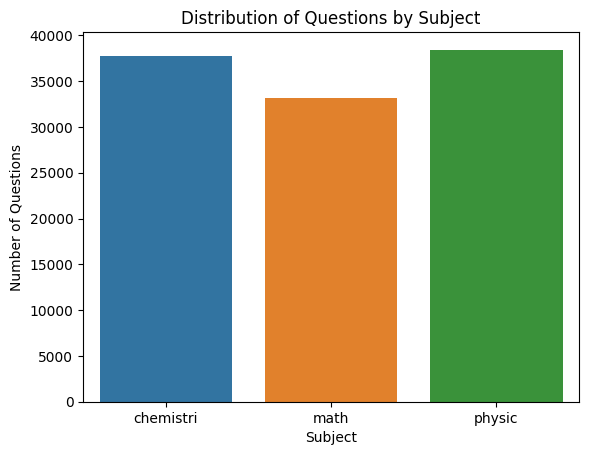

In [113]:
sns.countplot(x='Subject', data=question_df)
plt.title('Distribution of Questions by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Questions')
plt.show()

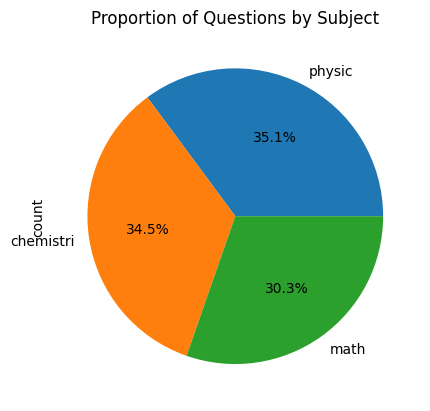

In [115]:
question_df['Subject'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Questions by Subject')
plt.show()

#### First we tokenize each question into individual words

In [51]:
tokenized_questions = question_df['Question'].apply(lambda x: word_tokenize(x))
tokenized_questions

13124     [among, the, follow, organ, acid, the, acid, p...
13125     [a, keton, ha, molar, mass, \, (, 86, \, ), wh...
13126     [an, ideal, ga, is, compress, in, a, close, co...
13127     [what, are, monosaccharid, explain, denatur, o...
13128             [the, product, \, (, b, \, ), can, be, :]
                                ...                        
122514    [a, pair, of, stationari, and, infinit, long, ...
122515    [the, energi, of, electron, in, the, ground, s...
122516                               [light, year, is, the]
122517                               [in, one, average-lif]
122518                     [state, whether, true, or, fals]
Name: Question, Length: 109395, dtype: object

#### We also remove the hyphens from between words

In [52]:
unhyphenated_questions = tokenized_questions.apply(lambda x: [w for word in x for w in word.split('-')])
unhyphenated_questions

13124     [among, the, follow, organ, acid, the, acid, p...
13125     [a, keton, ha, molar, mass, \, (, 86, \, ), wh...
13126     [an, ideal, ga, is, compress, in, a, close, co...
13127     [what, are, monosaccharid, explain, denatur, o...
13128             [the, product, \, (, b, \, ), can, be, :]
                                ...                        
122514    [a, pair, of, stationari, and, infinit, long, ...
122515    [the, energi, of, electron, in, the, ground, s...
122516                               [light, year, is, the]
122517                              [in, one, average, lif]
122518                     [state, whether, true, or, fals]
Name: Question, Length: 109395, dtype: object

In [22]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 7.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=f33413f9ff5f6779a81794071a2778e6df27e917fe38d923d6962056acf0d9be
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


#### Converting the question arrays back to string

In [54]:
stringed_question = unhyphenated_questions.apply(lambda x: ' '.join(x))
stringed_question

13124     among the follow organ acid the acid present i...
13125             a keton ha molar mass \ ( 86 \ ) which of
13126       an ideal ga is compress in a close contain it u
13127     what are monosaccharid explain denatur of protein
13128                        the product \ ( b \ ) can be :
                                ...                        
122514    a pair of stationari and infinit long bent wir...
122515    the energi of electron in the ground state of ...
122516                                    light year is the
122517                                   in one average lif
122518                           state whether true or fals
Name: Question, Length: 109395, dtype: object

#### Since many words are mis-spelled, we correct them using the `autocorrect` library

In [60]:
from autocorrect import Speller
from tqdm import tqdm

tqdm.pandas()

speller = Speller()

try:
    with open('corrected_questions.txt', 'r') as f:
        corrected_questions = f.read().split('\n')
        corrected_questions = pd.Series(corrected_questions).apply(lambda x: x.split())
except FileNotFoundError:
    corrected_questions = stringed_question.progress_apply(lambda x: speller(x))

corrected_questions

100%|██████████| 109395/109395 [1:20:39<00:00, 22.60it/s] 


13124     among the follow organ acid the acid present i...
13125            a ketone ha molar mass \ ( 86 \ ) which of
13126       an ideal ga is compress in a close contain it u
13127     what are monosaccharid explain senator of protein
13128                        the product \ ( b \ ) can be :
                                ...                        
122514    a pair of stationary and infinite long bent wi...
122515    the energy of electron in the ground state of ...
122516                                    light year is the
122517                                   in one average lif
122518                          state whether true or false
Name: Question, Length: 109395, dtype: object

#### Re-splitting the questions to remove stopwords

In [65]:
split_corrected_questions = corrected_questions.apply(lambda x: x.split())
split_corrected_questions

13124     [among, the, follow, organ, acid, the, acid, p...
13125     [a, ketone, ha, molar, mass, \, (, 86, \, ), w...
13126     [an, ideal, ga, is, compress, in, a, close, co...
13127     [what, are, monosaccharid, explain, senator, o...
13128             [the, product, \, (, b, \, ), can, be, :]
                                ...                        
122514    [a, pair, of, stationary, and, infinite, long,...
122515    [the, energy, of, electron, in, the, ground, s...
122516                               [light, year, is, the]
122517                              [in, one, average, lif]
122518                    [state, whether, true, or, false]
Name: Question, Length: 109395, dtype: object

In [71]:
questions_list = split_corrected_questions.apply(lambda x: [word for word in x if word not in english_stopwords])
questions_list

13124     [among, follow, organ, acid, acid, present, rc...
13125             [ketone, ha, molar, mass, \, (, 86, \, )]
13126              [ideal, ga, compress, close, contain, u]
13127            [monosaccharid, explain, senator, protein]
13128                           [product, \, (, b, \, ), :]
                                ...                        
122514    [pair, stationary, infinite, long, bent, wire,...
122515    [energy, electron, ground, state, hydrogen, at...
122516                                        [light, year]
122517                                  [one, average, lif]
122518                        [state, whether, true, false]
Name: Question, Length: 109395, dtype: object

#### Lemmatize the tokens to their base form

In [77]:
lemmatized_questions = questions_list.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
lemmatized_questions

13124     [among, follow, organ, acid, acid, present, rc...
13125             [ketone, ha, molar, mass, \, (, 86, \, )]
13126              [ideal, ga, compress, close, contain, u]
13127            [monosaccharid, explain, senator, protein]
13128                           [product, \, (, b, \, ), :]
                                ...                        
122514    [pair, stationary, infinite, long, bent, wire,...
122515    [energy, electron, ground, state, hydrogen, at...
122516                                        [light, year]
122517                                  [one, average, lif]
122518                        [state, whether, true, false]
Name: Question, Length: 109395, dtype: object

#### Reconvert all the arrays to strings

In [78]:
lemmatized_string_questions = pd.Series([' '.join(x) for x in lemmatized_questions])
lemmatized_string_questions

0         among follow organ acid acid present rcid butt...
1                           ketone ha molar mass \ ( 86 \ )
2                         ideal ga compress close contain u
3                     monosaccharid explain senator protein
4                                       product \ ( b \ ) :
                                ...                        
109390    pair stationary infinite long bent wire place ...
109391    energy electron ground state hydrogen atom \ (...
109392                                           light year
109393                                      one average lif
109394                             state whether true false
Length: 109395, dtype: object

#### Reset index of the dataframe to match the series

In [91]:
question_df.reset_index(inplace=True)
question_df

,index,Question,Options,Subject
0,13124,among the follow organ acid the acid present i...,"[pyruv acid, lactic acid, butyr acid, acet acid]",chemistri
1,13125,a keton ha molar mass \ ( 86 \ ) which of,"[the follow can not be iupnam of thi keton, 2 ...",chemistri
2,13126,an ideal ga is compress in a close contain it u,"[increas, decreas, remain same, both ( 1 ) \ &...",chemistri
3,13127,what are monosaccharid explain denatur of protein,"[nan, nan, nan, nan]",chemistri
4,13128,the product \ ( b \ ) can be :,"[\ ( \mathbf { \ ), \ ( h c h o \ ), \ ( \math...",chemistri
...,...,...,...,...
109390,122514,a pair of stationari and infinit long bent wir...,[current of \ ( 10 \ ) segment \ ( l \ ) and \...,physic
109391,122515,the energi of electron in the ground state of ...,[\ ( \boldsymbol { n } =\mathbf { 2 } \ ) to \...,physic
109392,122516,light year is the,"[light emit by the sun in one year, the time t...",physic
109393,122517,in one average-lif,"[half the activ nuclei decay, less than half t...",physic


In [93]:
question_df['String Corrected Question'] = lemmatized_string_questions
question_df

/tmp/ipykernel_34/1924858314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_df['String Corrected Question'] = lemmatized_string_questions


,index,Question,Options,Subject,String Corrected Question
0,13124,among the follow organ acid the acid present i...,"[pyruv acid, lactic acid, butyr acid, acet acid]",chemistri,among follow organ acid acid present rcid butt...
1,13125,a keton ha molar mass \ ( 86 \ ) which of,"[the follow can not be iupnam of thi keton, 2 ...",chemistri,ketone ha molar mass \ ( 86 \ )
2,13126,an ideal ga is compress in a close contain it u,"[increas, decreas, remain same, both ( 1 ) \ &...",chemistri,ideal ga compress close contain u
3,13127,what are monosaccharid explain denatur of protein,"[nan, nan, nan, nan]",chemistri,monosaccharid explain senator protein
4,13128,the product \ ( b \ ) can be :,"[\ ( \mathbf { \ ), \ ( h c h o \ ), \ ( \math...",chemistri,product \ ( b \ ) :
...,...,...,...,...,...
109390,122514,a pair of stationari and infinit long bent wir...,[current of \ ( 10 \ ) segment \ ( l \ ) and \...,physic,pair stationary infinite long bent wire place ...
109391,122515,the energi of electron in the ground state of ...,[\ ( \boldsymbol { n } =\mathbf { 2 } \ ) to \...,physic,energy electron ground state hydrogen atom \ (...
109392,122516,light year is the,"[light emit by the sun in one year, the time t...",physic,light year
109393,122517,in one average-lif,"[half the activ nuclei decay, less than half t...",physic,one average lif


### We then create a FastText model which takes in the cleaned questions as the corpus and creates vectors that will be used in classification.

We are using fastText as it can be extended to words not in the vocabulary by using sub word similarity

In [99]:
from gensim.models import FastText

try: 
    fasttext_model = FastText.load('fasttext_model.model')
except:
    fasttext_model = FastText(vector_size=100, window=5, min_count=1, workers=4, sg=1)
    fasttext_model.build_vocab(corpus_iterable=question_df['String Corrected Question'].apply(lambda x: x.split()))
    fasttext_model.train(corpus_iterable=question_df['String Corrected Question'].apply(lambda x: x.split()), total_examples=fasttext_model.corpus_count, epochs=10)
    fasttext_model.save('fasttext_model.model')

#### Creating X and y input for model training

In [100]:
X = []
for question in question_df['String Corrected Question']:
    question_vector = np.zeros(100)
    for word in question.split():
        question_vector += fasttext_model.wv[word]
    X.append(question_vector)

X = np.array(X)

X.shape

(109395, 100)

In [102]:
y = question_df['Subject']
y

0         chemistri
1         chemistri
2         chemistri
3         chemistri
4         chemistri
            ...    
109390       physic
109391       physic
109392       physic
109393       physic
109394       physic
Name: Subject, Length: 109395, dtype: object

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, max_depth=30, random_state=42) # Best RFC after GridSearch

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=400, random_state=42)

              precision    recall  f1-score   support

   chemistri       0.84      0.88      0.86      7620
        math       0.93      0.89      0.91      6649
      physic       0.84      0.84      0.84      7610

    accuracy                           0.87     21879
   macro avg       0.87      0.87      0.87     21879
weighted avg       0.87      0.87      0.87     21879



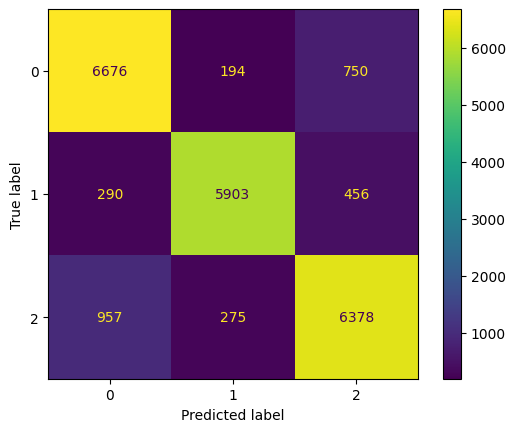

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


y_pred = rf.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [154]:
import joblib

joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [152]:
wordcloud_stopwords = r"""
assert
follow
boldsymbol
mathrm
mathbf
begin
<space>
@ 
\ 
, 
; 
: 
! 
- 
= 
> 
< 
+ 
'
` 
| 
( 
) 
[ 
] 
addcontentsline
addtocontents
addtocounter
address
addtolength
addvspace
alph
appendix
arabic
author
backslash
baselineskip
baselinestretch
bf
bibitem
bigskip
boldmath
cal
caption
cdots
centering
circle
cite
cleardoublepage
clearpage
cline
\closing
ashbox
\date
ddots
dotfill
em
ensuremath 
fbox
flushbottom
fnsymbol
footnote
footnotemark
footnotesize
footnotetext
frac
frame
framebox
frenchspacing
hfill
hline
hrulefill
hspace
huge
Huge
hyphenation
include
includeonly
indent
input
it
item
kill
label
large
Large 
LARGE 
ldots
left
lefteqn
line
linebreak
linethickness
linewidth
location
makebox
maketitle
markboth 
markright
mathcal
mathop
mbox
medskip
multicolumn
multiput
newcommand
newcounter
newenvironment
newfont
newlength
newline
newpage
newsavebox
newtheorem
nocite
noindent
nolinebreak
normalsize 
nopagebreak
not
onecolumn
opening
oval
overbrace
overline
pagebreak
pagenumbering
pageref
pagestyle
par
parbox
parindent
parskip
protect
providecommand
put
raggedbottom
raggedleft
raggedright
raisebox
ref
renewcommand
right
rm
roman
rule
savebox
sbox
sc
scriptsize
setcounter
setlength
settowidth
sf
shortstack
signature
sl
small
smallskip
sqrt
stackrel
tableofcontents
telephone
textwidth
textheight
thanks
thispagestyle
tiny
title
today
tt
twocolumn
typeout
typein
underbrace
underline
unitlength
usebox
usecounter
value
vdots
vector
verb
vfill
vline
vphantom
vspace
"""

special_stopwords = wordcloud_stopwords.split('\n')



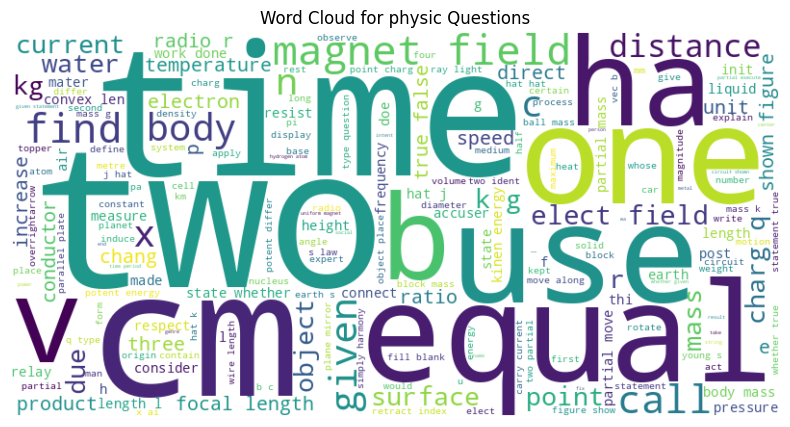

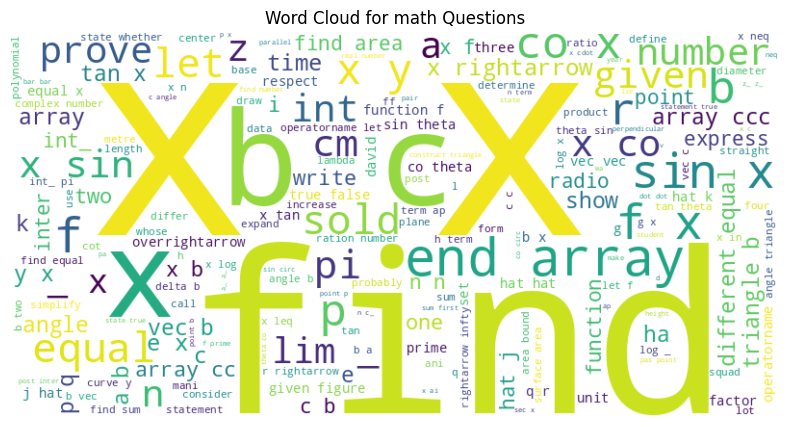

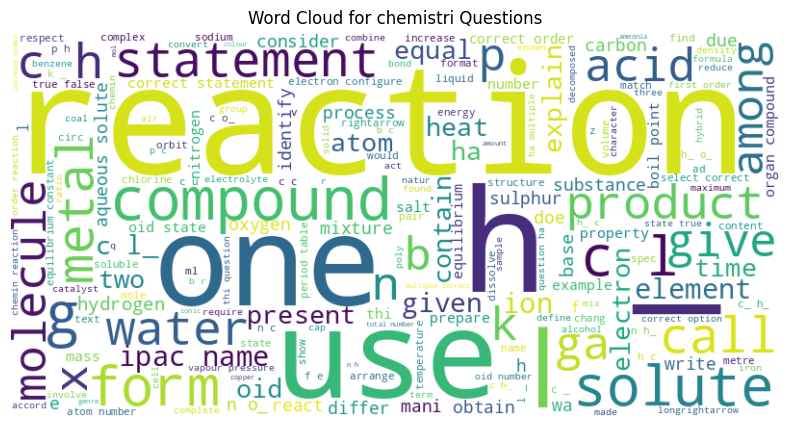

In [153]:
from wordcloud import WordCloud


def word_clouds(subject):
    text = ' '.join(question_df[question_df['Subject'] == subject]['String Corrected Question'])
    wordcloud = WordCloud(stopwords=special_stopwords ,width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {subject} Questions')
    plt.show()
    
word_clouds('physic')
word_clouds('math')
word_clouds('chemistri')

In [155]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

   chemistri       0.79      0.85      0.82      7620
        math       0.87      0.84      0.86      6649
      physic       0.80      0.76      0.78      7610

    accuracy                           0.82     21879
   macro avg       0.82      0.82      0.82     21879
weighted avg       0.82      0.82      0.82     21879



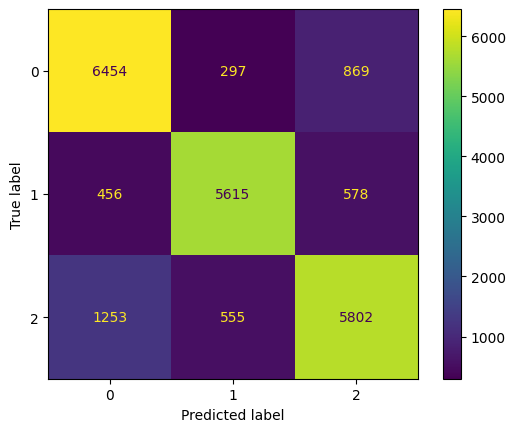

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


y_pred_lr = lr.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()

print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

In [157]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

   chemistri       0.81      0.87      0.84      7620
        math       0.91      0.88      0.89      6649
      physic       0.84      0.80      0.82      7610

    accuracy                           0.85     21879
   macro avg       0.85      0.85      0.85     21879
weighted avg       0.85      0.85      0.85     21879



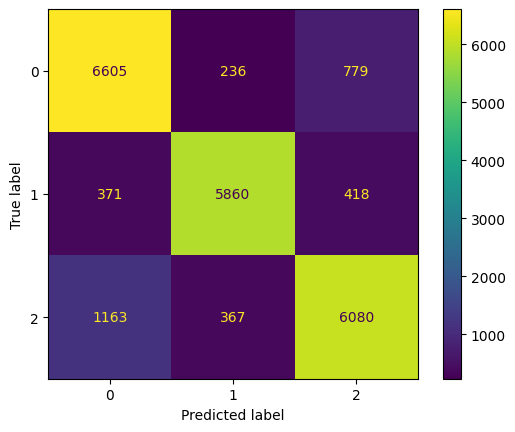

In [158]:
y_pred_svc = svc.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc)).plot()

print(classification_report(y_test, y_pred_svc, target_names=label_encoder.classes_))